# **Computer Infrastructure - Problems**

### Authored by: Stephen Kerr
---

## **Introduction:**

This notebook contains my submission for my module assessent for **Computer Infrastructure** titled **Problems**.  
The assessment consists of 4 parts: 
1. Data from yfinance,
2. Plotting Data,
3. Script, 
4. Automation.


### **yfinance**
The assessment is built around the `yfinance` Python Package (see it's documentation [here](https://ranaroussi.github.io/yfinance/)).  
The Python Package fetches finanical & market data from [Yahoo! Finance](https://finance.yahoo.com/), `yfinance` is an open-source tool that uses Yahoo's publicaly available APIs, it is not affiliated with Yahoo, and it was created with the intended use is in research and education.  
Also see yFinance's Github documentation - https://ranaroussi.github.io/yfinance/

## Imports 

In [1]:
# Imports
import yfinance as yf # importing yfinance to access stock data

import datetime # importing datetime to access dates & times

import os # importing os to handle file paths

import matplotlib.pyplot as plt # importing matplotlib to plot data

import pandas as pd # importing pandas to handle dataframes

----
## Problem 1: Data from yfinance

### **Brief:** 
>Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the >five FAANG stocks:  
>- Facebook (META)
>- Apple (AAPL)
>- Amazon (AMZN)
>- Netflix (NFLX)
>- Google (GOOG) 
> 
>The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the >four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
>Create the `data` folder if you don't already have one.


### Explaining my code for `get_data()`: 


In [2]:
# Problem 1 Get data function
# See the yf.download function documentation here - (https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html)
# used w3b schools page on datetime formatting - (https://www.w3schools.com/python/python_datetime.asp)
# os.path documentation - (https://docs.python.org/3/library/os.path.html#module-os.path)

def get_data(tickers=None, period='5d', interval='1h', save_dir='data'):
    '''
    Download data from yfinance and saves it to a csv file.
    Defaults to FAANG stocks if tickers is not passed.
    Filename Format: 'YYYYMMDD-HHmmss.csv'
    Returns the filepath and dataframe.
    '''
    
    if tickers is None:
        tickers = ['META','AAPL','AMZN','NFLX','GOOG']  # default to FAANG stocks
    
    # download the data
    df = yf.download(tickers=tickers, period=period, interval=interval)

    # save the dataframe to a csv file titled 'YYYYMMDD-HHmmss.csv'
    # in a data folder (note name of file should be the creation date and time)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    filename = datetime.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'
    filepath = os.path.join(save_dir, filename)
    df.to_csv(filepath) # save to csv
    
    return filepath, df 

#### **Example Usage `get_data()`**
Below is an example of using the `get_data()` function coded above. In the example usage the FAANG Companies are passed to the function and the data is saved to the 'data' directory.   

Note in the next code cell the same due to the deafult configuration being the same as what is passed to `get_data()` the same data is fetch and saved. 

In [3]:
# FAANG using the function
filepath, faang = get_data(['META','AAPL','AMZN','NFLX', 'GOOG']) 
print(f'See file at: {filepath}')
print(faang.head(3))



/tmp/ipykernel_9984/503242522.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=tickers, period=period, interval=interval)
[*********************100%***********************]  5 of 5 completed

See file at: data/20251109-183207.csv
Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-03 14:30:00+00:00  267.630005  255.339996  283.109985  648.506592   
2025-11-03 15:30:00+00:00  266.640015  255.460007  282.940002  649.875000   
2025-11-03 16:30:00+00:00  267.535004  256.010315  282.839996  650.169983   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-03 14:30:00+00:00  1099.681763  270.779999  258.600006  283.350006   
2025-11-03 15:30:00+00:00  1080.439941  268.279999  256.859985  283.880005   
2025-11-03 16:30:00+00:00  1089.849976  268.149994  256.440002  284.100006   

Price                         

In [4]:
# Default using the function
default_get_data = get_data()

# Note have to specific that I want the dataframe from the returned tuple as it returns (filepath, dataframe)
print(default_get_data[1].head(3))

/tmp/ipykernel_9984/503242522.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=tickers, period=period, interval=interval)
[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-03 14:30:00+00:00  267.630005  255.339996  283.109985  648.506592   
2025-11-03 15:30:00+00:00  266.640015  255.460007  282.940002  649.875000   
2025-11-03 16:30:00+00:00  267.535004  256.010315  282.839996  650.169983   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-03 14:30:00+00:00  1099.681763  270.779999  258.600006  283.350006   
2025-11-03 15:30:00+00:00  1080.439941  268.279999  256.859985  283.880005   
2025-11-03 16:30:00+00:00  1089.849976  268.149994  256.440002  284.100006   

Price                                               ...        Open 

----
## Problem 2: Plotting Data

### **Brief:** 
>Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.  
>The plot should include axis labels, a legend, and the date as a title.  
>The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.  
>Create the `plots` folder if you don't already have one.  


### Explaining my code for `plot_data()`: 


In [14]:
# function plotdata(): plots the Close prices of the stocks in the dataframe
# pasing the filepath to read the csv file back in

def plot_data(filepath):
    '''
    Pass the filepath of the Stock data CSV file.
    Plots the Close prices of the stocks in the dataframe and saves the plot to a plots folder.
    '''
    df = pd.read_csv(filepath, header=[0,1], index_col=0, parse_dates=True)
    
    # plot the Close prices
    close_df = df['Close']
    close_df.plot(title=f'Close Prices of Stocks {datetime.datetime.now().strftime("%Y-%m-%d")}', figsize=(10,6))
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(title='Stocks')
    plt.grid()
    

    # save the plot to a plots folder
    plots_dir = 'plots'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    plot_filename = os.path.splitext(os.path.basename(filepath))[0] + '_close_prices.png'
    plot_filepath = os.path.join(plots_dir, plot_filename)
    plt.savefig(plot_filepath)
    plt.show()

    return plot_filepath




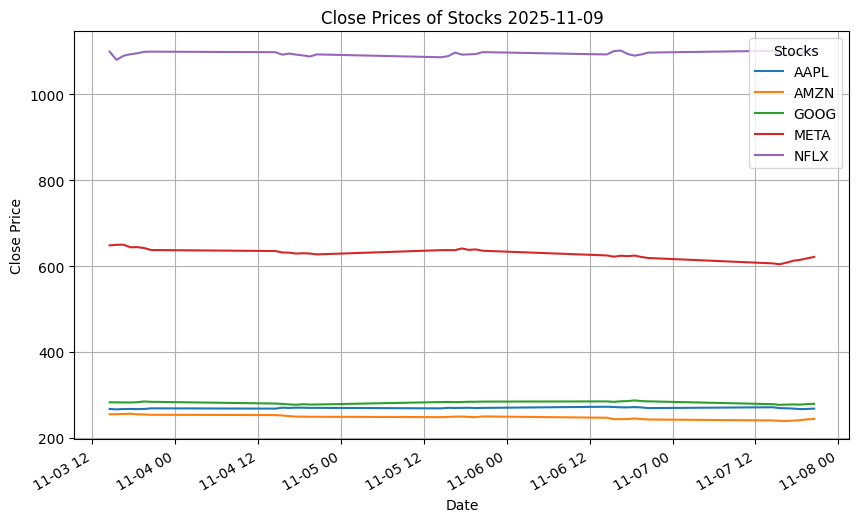

'plots/20251109-182030_close_prices.png'

In [15]:
# testing plot_data function
graph_data_filepath = 'data/20251109-182030.csv'
plot_data(graph_data_filepath)

----
## Problem 3: Script

### **Brief:** 
>Create a Python script called `faang.py` in the root of your repository.  
>Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.  
>Note that this will require a shebang line and the script to be marked executable.  
>Explain the steps you took in your notebook.  


## My Scripting Explaintion: faang.py

### Steps took to create the faang.py
1. Copied the Python Libraries required from the start of this notebook.
    - Specifically, yfinance, datatime, os, matplotlib.pyplot, pandas.
2. Copied the `get_data()` function from this notebook. 
    - Note, didn't make any edits to the function.
3. Copied the `plot_data()` function from this notebook.
    - Note, commeted out the `plt.show()` as this will be run as a script.
4. For testing added in 'if __name__ == '__main__' example usage.
5. Added the shebang line to the top of the file
    - **'#! /usr/bin/env python'**
6. Tried to run the script using **'./faang.py'** in the terminal but got an error: 
    - 'bash: ./faang.py: Permission denied'
    - See current permissions (-rw-rw-rw-  1 codespace codespace  2492 Nov  9 19:13 faang.py)
7. Therefore, I changed the permissions on the **'faang.py'** to allow the file to be executed using the following: 
    - chmod u+x faang.py
    - This updated the permissions to (-rwxrw-rw-  1 codespace codespace  2492 Nov  9 19:13 faang.py)
8. Finally, I ran the **'./faang.py'** again, and it was executed successfully.

----
## Problem 4: Automation

### **Brief:** 
>Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.  
>The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.  
>In your notebook, explain each of the individual lines in your workflow.  


## **End**